In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [ ]:
df= pd.read_csv('/content/Bangalore  house data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df=df.drop(columns=['location','society'])

In [ ]:
df.rename(columns={'availability':'Furnishing','size':'BHK','bath':'Bathroom','total_sqft':'Area','balcony':'Parking'},inplace=True)
df

,area_type,Furnishing,BHK,Area,Bathroom,Parking,price
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,4 BHK,4689,4.0,1.0,488.00


In [ ]:
df['Area']=df['Area'].astype(str)
numeric_values = pd.to_numeric(df['Area'].str.extract(r'(\d{4})', expand=False), errors='coerce').fillna(0)

# Calculate the average only for non-zero numeric values
non_zero_values = numeric_values[numeric_values != 0]
average_value = non_zero_values.mean()

# Replace values in the "area" column where the first 4 characters are not integers with the calculated average
df['Area'] = numeric_values.where(numeric_values != 0, average_value)

In [ ]:
df['Area']

0        1056.000000
1        2600.000000
2        1440.000000
3        1521.000000
4        1200.000000
            ...     
13315    3453.000000
13316    3600.000000
13317    1141.000000
13318    4689.000000
13319    1653.231411
Name: Area, Length: 13320, dtype: float64

In [ ]:
# import re
# df['Area']=df['Area'].astype(str)
# def extract_area_value(value):
#     # Extract numeric values using regex
#     numeric_values = re.findall(r'\b\d+\.*\d*\b', value)

#     # If there are multiple values, calculate the average
#     if len(numeric_values) > 1:
#         numeric_values = [float(val) for val in numeric_values]
#         return sum(numeric_values) / len(numeric_values)
#     elif numeric_values:
#         return float(numeric_values[0])
#     else:
#         return None  # Handle cases where no numeric values are found

# # Apply the extraction function to the "Area" column
# df['Area'] = df['Area'].apply(extract_area_value)

In [ ]:
# conversion_factors = {
#     'Super built-up': 2,
#     'Built-up  Area': 1.5,
#     'Carpet  Area': 1.4,
#     'Plot  Area': 1.0
# }

# # Apply conversion factors to approximate total plot area
# df['Area'] = df['Area'] * df['area_type'].map(conversion_factors)

In [ ]:
df['Price']=100000*df['price']

In [ ]:
df['Price']

0         3907000.0
1        12000000.0
2         6200000.0
3         9500000.0
4         5100000.0
            ...    
13315    23100000.0
13316    40000000.0
13317     6000000.0
13318    48800000.0
13319     1700000.0
Name: Price, Length: 13320, dtype: float64

In [ ]:
df['BHK']=df['BHK'].astype(str)

In [ ]:
df['BHK'] = df['BHK'].str.extract('(\d)').fillna(1).astype(int)

In [ ]:
df['Furnishing']=df['Furnishing'].astype(str)
df['Furnishing'] = df['Furnishing'].replace({'Ready To Move': 'Furnished', pd.NA: 'Unfurnished'})
df['Furnishing'].replace(to_replace=r'^(?!Furnished$|Unfurnished$).*$', value='Semi Furnished', regex=True, inplace=True)

In [ ]:
df

,area_type,Furnishing,BHK,Area,Bathroom,Parking,price,Price
0,Super built-up Area,Semi Furnished,2,1056.000000,2.0,1.0,39.07,3907000.0
1,Plot Area,Furnished,4,2600.000000,5.0,3.0,120.00,12000000.0
2,Built-up Area,Furnished,3,1440.000000,2.0,3.0,62.00,6200000.0
3,Super built-up Area,Furnished,3,1521.000000,3.0,1.0,95.00,9500000.0
4,Super built-up Area,Furnished,2,1200.000000,2.0,1.0,51.00,5100000.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Furnished,5,3453.000000,4.0,0.0,231.00,23100000.0
13316,Super built-up Area,Furnished,4,3600.000000,5.0,NaN,400.00,40000000.0
13317,Built-up Area,Furnished,2,1141.000000,2.0,1.0,60.00,6000000.0
13318,Super built-up Area,Semi Furnished,4,4689.000000,4.0,1.0,488.00,48800000.0


In [ ]:
df.fillna(round(df.mean(),0), inplace=True)

<ipython-input-13-77e2e187ff41>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(round(df.mean(),0), inplace=True)


In [ ]:
df['Furnishing'], mapping_info = pd.factorize(df['Furnishing'])
df['Furnishing'] += 1
for original_value, mapped_value in zip(mapping_info, range(1, len(mapping_info) + 1)):
    print(f"{original_value} is mapped to {mapped_value}")

Semi Furnished is mapped to 1
Furnished is mapped to 2


In [ ]:
df

,area_type,Furnishing,BHK,Area,Bathroom,Parking,price,Price
0,Super built-up Area,1,2,1056.000000,2.0,1.0,39.07,3907000.0
1,Plot Area,2,4,2600.000000,5.0,3.0,120.00,12000000.0
2,Built-up Area,2,3,1440.000000,2.0,3.0,62.00,6200000.0
3,Super built-up Area,2,3,1521.000000,3.0,1.0,95.00,9500000.0
4,Super built-up Area,2,2,1200.000000,2.0,1.0,51.00,5100000.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,2,5,3453.000000,4.0,0.0,231.00,23100000.0
13316,Super built-up Area,2,4,3600.000000,5.0,2.0,400.00,40000000.0
13317,Built-up Area,2,2,1141.000000,2.0,1.0,60.00,6000000.0
13318,Super built-up Area,1,4,4689.000000,4.0,1.0,488.00,48800000.0


In [ ]:
y=df['Price']
X=df.drop(columns=['Price','price','area_type'])
X=X[['Area','BHK','Bathroom','Parking','Furnishing']]
X

,Area,BHK,Bathroom,Parking,Furnishing
0,1056.000000,2,2.0,1.0,1
1,2600.000000,4,5.0,3.0,2
2,1440.000000,3,2.0,3.0,2
3,1521.000000,3,3.0,1.0,2
4,1200.000000,2,2.0,1.0,2
...,...,...,...,...,...
13315,3453.000000,5,4.0,0.0,2
13316,3600.000000,4,5.0,2.0,2
13317,1141.000000,2,2.0,1.0,2
13318,4689.000000,4,4.0,1.0,1


In [ ]:
y

0         3907000.0
1        12000000.0
2         6200000.0
3         9500000.0
4         5100000.0
            ...    
13315    23100000.0
13316    40000000.0
13317     6000000.0
13318    48800000.0
13319     1700000.0
Name: Price, Length: 13320, dtype: float64

In [ ]:
min(y)

800000.0

Mean Squared Error: 125075284650642.06


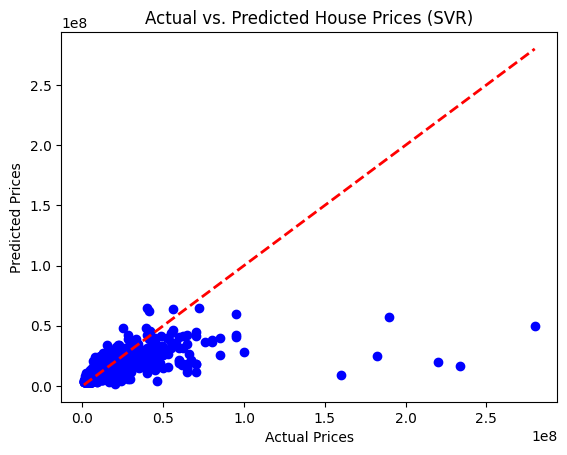

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVR)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train an SVR model
model = SVR(kernel='rbf')  # You can experiment with different kernels (linear, rbf, etc.)
model.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Transform predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices (SVR)")
plt.show()

In [ ]:
import joblib
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
joblib.dump(model, 'model_banglore.joblib')
joblib.dump(scaler_X, 'scaler_x_banglore.joblib')
joblib.dump(scaler_y, 'scaler_y_banglore.joblib')

['scaler_y_banglore.joblib']

In [ ]:
new_X = pd.DataFrame({'Area': [800], 'BHK': [1],'Bathroom': [2],'Parking':[2],'Furnishing':[1]})

# Standardize the new features using the same scaler from training
new_X_scaled = scaler_X.transform(new_X)

# Make predictions on the new feature vector
new_y_pred_scaled = model.predict(new_X_scaled)
new_y_pred = scaler_y.inverse_transform(new_y_pred_scaled.reshape(-1, 1)).ravel()
new_y_pred

array([5374327.899747])

                                       Correlation Matrix                                       


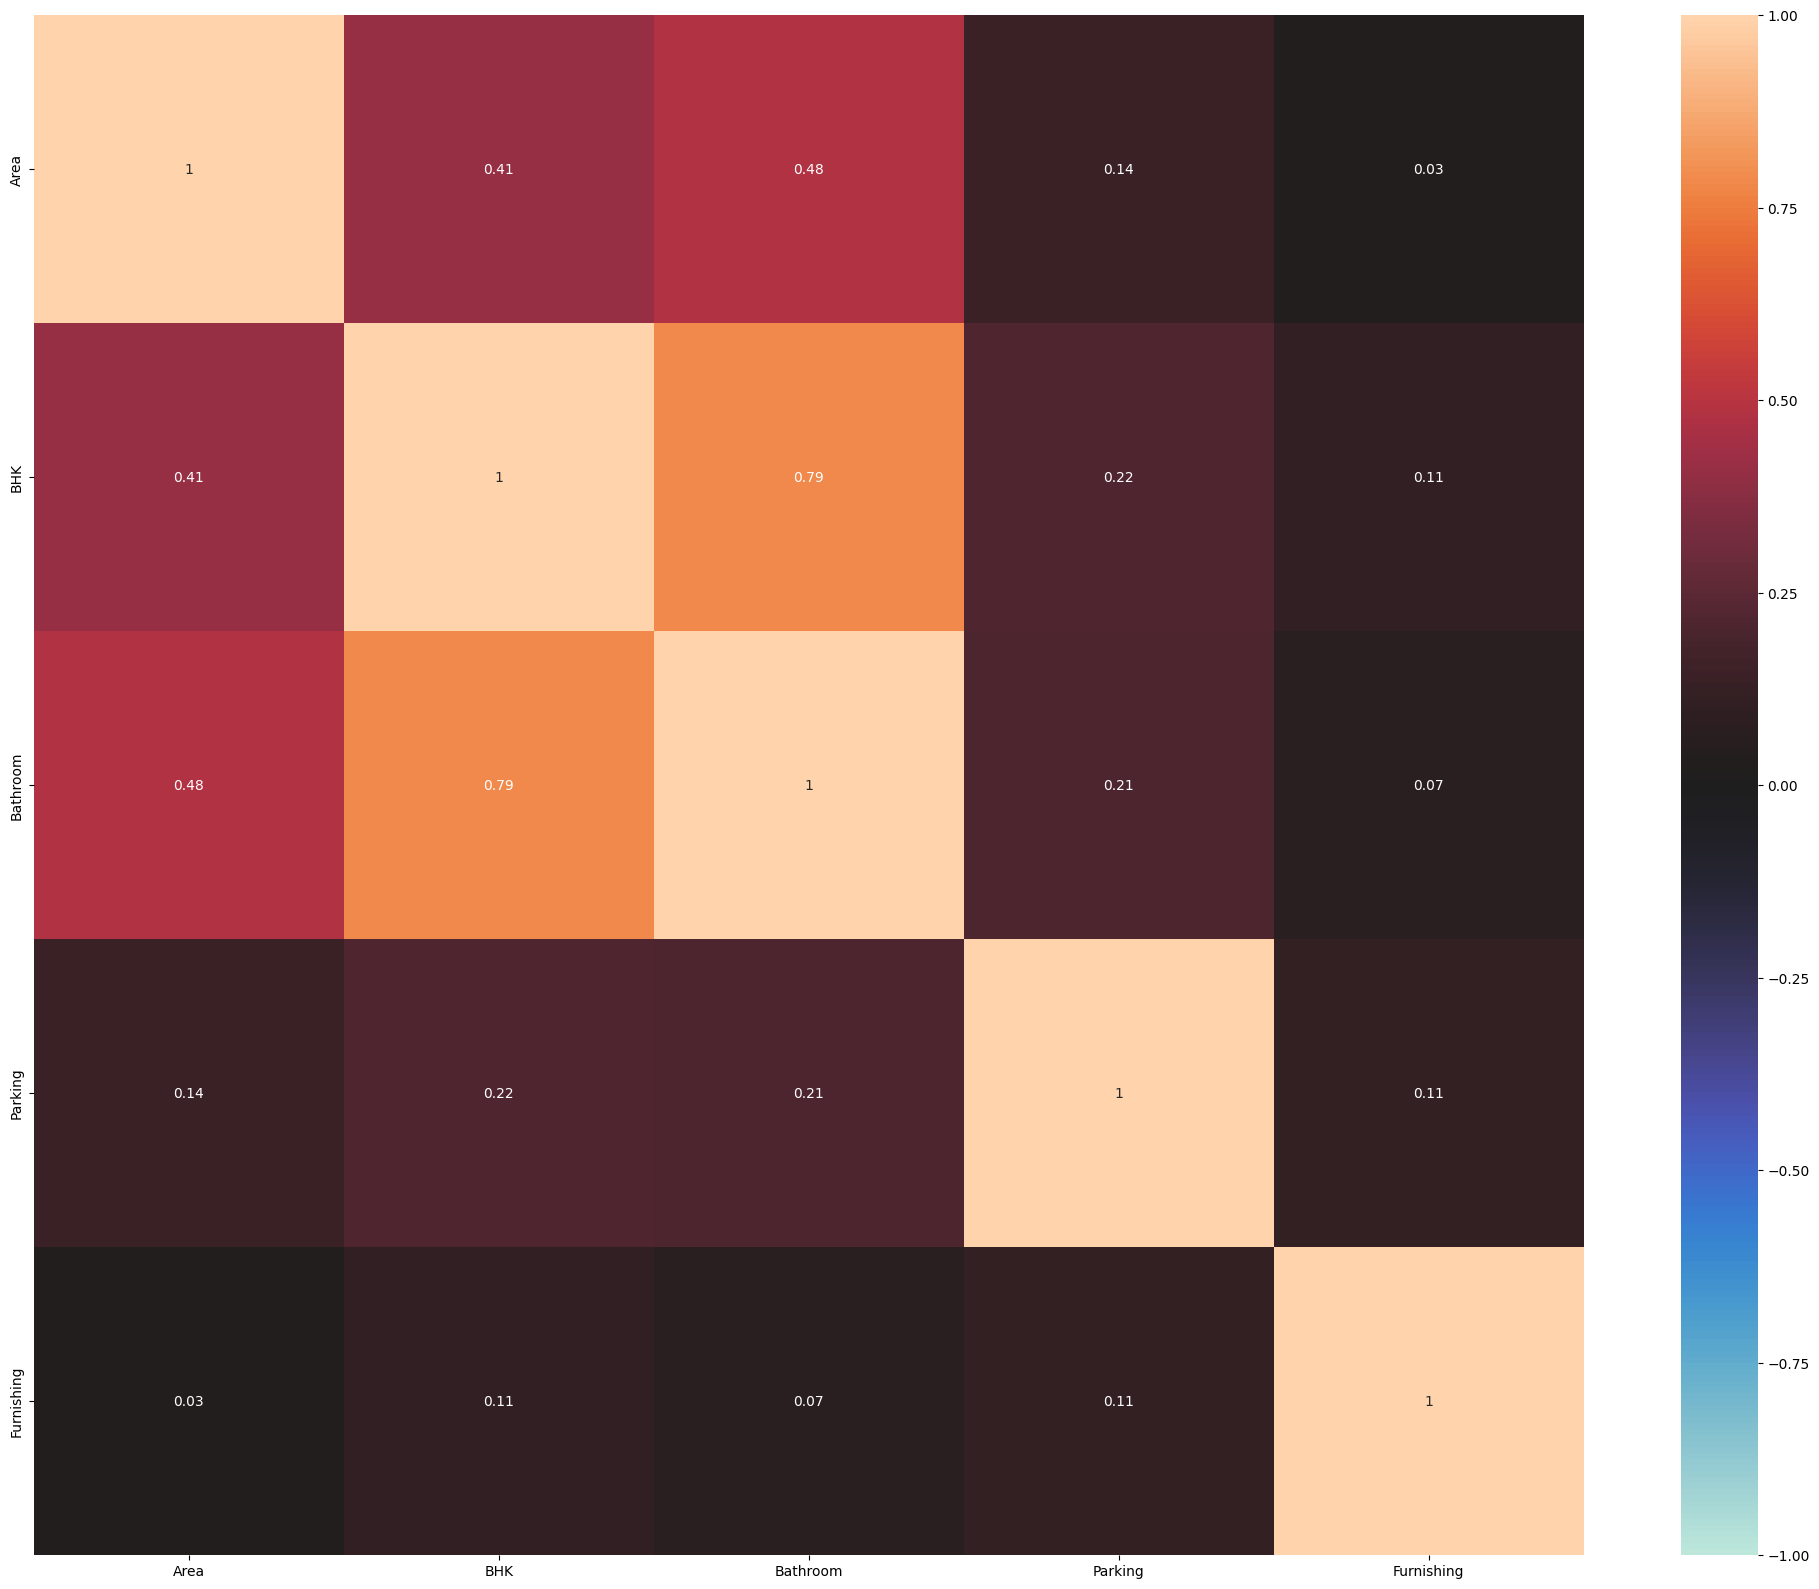

In [ ]:
import seaborn as sns
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(X.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [ ]:
# g = sns.pairplot(X)
# plt.title('Pairplots for all the Feature')
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

In [ ]:
from google.colab import files

# Download the saved model and scaler files
files.download('model_banglore.joblib')
files.download('scaler_x_banglore.joblib')
files.download('scaler_y_banglore.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>